# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.regularizers import l2
from keras import layers
from keras.optimizers import Adam


In [ ]:
# Load Data
dataset=pd.read_csv('drive/My Drive/Colab Notebooks/creditcard.csv')

In [ ]:
# Display Data shape
display(dataset.shape)

(284807, 31)

In [ ]:
# Display Data
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Check for null values
display(dataset.isnull())
display(dataset.isnull().sum())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
# Standardize the data
sc=StandardScaler()
dataset[['Time','Amount']]=sc.fit_transform(dataset[['Time','Amount']])

In [ ]:
display(dataset.head())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


#### Data is highly unbalanced
#### Using Oversampling to balance data

In [ ]:
# Identifying class 1 and class 0 counts
df_class_0_count,df_class_1_count=dataset['Class'].value_counts()
print("Class 0:",df_class_0_count, "Class 1:",df_class_1_count)

Class 0: 284315 Class 1: 492


In [ ]:
# Separating class 1 and class 0 datasets
df_class_0=dataset[dataset['Class']==0]
df_class_1=dataset[dataset['Class']==1]

In [ ]:
print("df_class_0 size:", df_class_0.shape)
print("df_class_1 size:", df_class_1.shape)

df_class_0 size: (284315, 31)
df_class_1 size: (492, 31)


In [ ]:
# OverSampling Class 1 data to make the dataset balanced
df_class_1_over=df_class_1.sample(df_class_0_count,replace=True)
df_over=pd.concat([df_class_1_over,df_class_0],axis=0)

df_over_1_count,df_over_0_count=df_over['Class'].value_counts()
print("Class 1:",df_over_1_count, "Class 0:",df_over_0_count)
print("df_over_1 size:", df_over.shape)

Class 1: 284315 Class 0: 284315
df_over_1 size: (568630, 31)
1    284315
0    284315
Name: Class, dtype: int64


In [ ]:
# Shuffling the new dataset
df=df_over.sample(frac=1,random_state=42)

In [ ]:
# Split data into Input and Output
X=df.iloc[:,:-1].values
Y=df.iloc[:,-1].values

In [ ]:
# Determine size for each training,test and validation set
data_size = len(X)

train_size = int(round(data_size*0.50))
test_size = int(round(data_size*0.30))
val_size = int(round(data_size*0.20))

print("train size:",train_size)
print("validation size:",val_size)
print("test size", test_size)

train size: 284315
validation size: 113726
test size 170589


In [ ]:
# Split data into train and test set
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=test_size,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=val_size,random_state=42)


In [ ]:
# Display training data shape
display(x_train.shape)
display(y_train.shape)

# Display testing data shape
display(x_test.shape)
display(y_test.shape)

# Display validation data shape
display(x_val.shape)
display(y_val.shape)

(284315, 30)

(284315,)

(170589, 30)

(170589,)

(113726, 30)

(113726,)

In [ ]:
# Model with Overfitting removed
model=Sequential()
model.add(layers.Dense(16,activation='relu',bias_regularizer=l2(0.01),kernel_regularizer=l2(0.01),input_shape=(x_train.shape[1],)))
model.add(layers.Dense(10,bias_regularizer=l2(0.01),kernel_regularizer=l2(0.01),activation='relu'))
model.add(layers.Dense(10,bias_regularizer=l2(0.01),kernel_regularizer=l2(0.01),activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_val,y_val))

Epoch 1/10
2222/2222 [==============================] - 4s 2ms/step - loss: 0.3528 - accuracy: 0.9290 - val_loss: 0.1427 - val_accuracy: 0.9722
Epoch 2/10
2222/2222 [==============================] - 4s 2ms/step - loss: 0.1322 - accuracy: 0.9737 - val_loss: 0.1143 - val_accuracy: 0.9808
Epoch 3/10
2222/2222 [==============================] - 4s 2ms/step - loss: 0.1091 - accuracy: 0.9829 - val_loss: 0.0975 - val_accuracy: 0.9859
Epoch 4/10
2222/2222 [==============================] - 3s 2ms/step - loss: 0.0943 - accuracy: 0.9869 - val_loss: 0.0891 - val_accuracy: 0.9881
Epoch 5/10
2222/2222 [==============================] - 4s 2ms/step - loss: 0.0838 - accuracy: 0.9895 - val_loss: 0.0825 - val_accuracy: 0.9888
Epoch 6/10
2222/2222 [==============================] - 4s 2ms/step - loss: 0.0767 - accuracy: 0.9916 - val_loss: 0.0728 - val_accuracy: 0.9944
Epoch 7/10
2222/2222 [==============================] - 4s 2ms/step - loss: 0.0738 - accuracy: 0.9919 - val_loss: 0.0702 - val_accuracy:

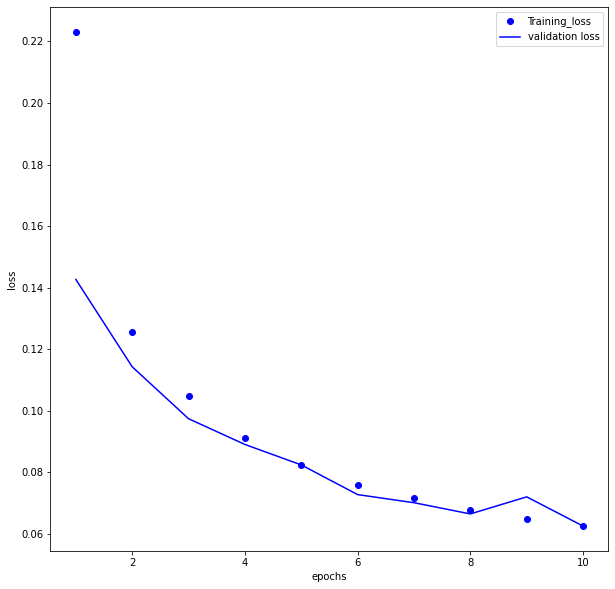

In [ ]:
# Graph between Training and Validation loss 
import matplotlib.pyplot as plt
history_dict=history.history
train_loss=history_dict['loss']
val_loss=history_dict['val_loss']
epochs=range(1,len(train_loss)+1)
plt.figure(figsize=(10,10))
plt.plot(epochs,train_loss,'bo',label='Training_loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title("Graph between Training and Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

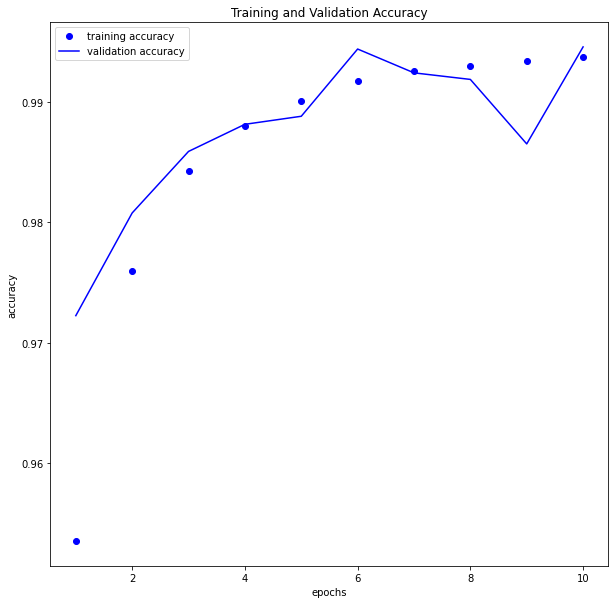

In [ ]:
# Graph between Training and Validation accuracy
train_accuracy=history_dict['accuracy']
val_accuracy=history_dict['val_accuracy']
plt.figure(figsize=(10,10))
plt.plot(epochs,train_accuracy,'bo',label='training accuracy')
plt.plot(epochs,val_accuracy,'b',label='validation accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Combining Train and Validation Sets to evaluate results
train_data=np.concatenate([x_train,x_val],axis=0)
train_targets=np.concatenate([y_train,y_val],axis=0)

display(train_data.shape)
display(train_targets.shape)

(398041, 30)

(398041,)

In [ ]:
# Evaluation
model=Sequential()
model.add(layers.Dense(16,activation='relu',bias_regularizer=l2(0.01),kernel_regularizer=l2(0.01),input_shape=(x_train.shape[1],)))
model.add(layers.Dense(10,bias_regularizer=l2(0.01),kernel_regularizer=l2(0.01),activation='relu'))
model.add(layers.Dense(10,bias_regularizer=l2(0.01),kernel_regularizer=l2(0.01),activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_data,train_targets,epochs=10,batch_size=128,verbose=0)

In [ ]:
results=model.evaluate(train_data,train_targets)
display(results)

12439/12439 [==============================] - 11s 880us/step - loss: 0.0570 - accuracy: 0.9930


[0.05702883005142212, 0.9929755926132202]

In [ ]:
# Testing accuracy is 99.29%

In [ ]:
# Prediction
y_pred=model.predict(x_test)
y_pred=y_pred>0.5
display(y_pred)


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84193   805]
 [  328 85263]]


In [ ]:
# Recall = TruePositives / (TruePositives + FalseNegatives)
# Precision = TruePositives / (TruePositives + FalsePositives)

# [[84193   805]
#  [  328 85263]]

Recall=84193/(84193+805)
Precision=84193/(84193+328)
print("Recall is: ", Recall)
print("Precision is: ", Precision)

Recall is:  0.9905291889220923
Precision is:  0.9961193076276902
